## Trabalho Análise de Modelos Preditivos com Sklearn


Aluno: Leonardo Henrique de Figueiredo

Modelo de aprendizado nao supervisionado


# Problema:

Verificarmos a demanda de bicicletas compartilhadas com a variacao da temperatura na cidade.

https://www.kaggle.com/competitions/bike-sharing-demand/data

# Definicao dos dados no dataset

datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals



In [1]:
#importacao de dependencias 
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [414]:
#importacao da biblioteca do kaggle e usando API do site
import kaggle

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [4]:
#autenticacao no Kaggle e download da base de dados

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

!kaggle competitions download -c bike-sharing-demand

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [52]:
#descompactando arquivo
import zipfile

with zipfile.ZipFile('/home/sklearn/Trabalho/bike-sharing-demand.zip', 'r') as zipref:
    zipref.extractall('/home/sklearn/Trabalho/bike-sharing-demand')

In [2]:
# leitura da base de dados --- alterado nome e caminho para sua avaliacao 
df = pd.read_csv("/home/Trabalho/pasta_dataset3/dataset3.csv.csv", header=0)

In [3]:
df.shape

(10886, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [6]:
# fazendo um split da data e hora
df["datetime"] = pd.to_datetime(df.datetime)

#split columns
df["date"] = df["datetime"].dt.date
df["time"] = df["datetime"].dt.time

In [7]:
# definindo um novo database
dfdate=df

In [8]:
dfdate.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count        date      time  
0        81        0.0       3          13     16  2011-01-01  00:00:00  
1        80        0.0       8          32     40  2011-01-01  01:00:00  
2        80        0.0       5          27     32  2011-01-01  02:00:00  
3        75        0.0       3          10     13  2011-01-01  03:00:00  
4        75        0.0       0           1      1  2011-01-01  04:00:00

In [9]:
#split da data em ano e mes
dfdate["date"] = pd.to_datetime(dfdate["date"])
dfdate['year'] = pd.DatetimeIndex(dfdate['date']).year
dfdate['month'] = pd.DatetimeIndex(dfdate['date']).month

In [10]:
#apagando colunas que nao serao mais utilizadas
dfc = dfdate.drop(['datetime','date', 'time'], axis=1)

In [11]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [12]:
dfc.head(15)

season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0        1        0           0        1   9.84  14.395        81     0.0000   
1        1        0           0        1   9.02  13.635        80     0.0000   
2        1        0           0        1   9.02  13.635        80     0.0000   
3        1        0           0        1   9.84  14.395        75     0.0000   
4        1        0           0        1   9.84  14.395        75     0.0000   
5        1        0           0        2   9.84  12.880        75     6.0032   
6        1        0           0        1   9.02  13.635        80     0.0000   
7        1        0           0        1   8.20  12.880        86     0.0000   
8        1        0           0        1   9.84  14.395        75     0.0000   
9        1        0           0        1  13.12  17.425        76     0.0000   
10       1        0           0        1  15.58  19.695        76    16.9979   
11       1        0           0        1  14.76  16.665        81    19.0012   
12       1        0           0        1  17.22  21.210        77    19.0012   
13       1        0           0        2  18.86  22.725        72    19.9995   
14       1        0           0        2  18.86  22.725        72    19.0012   

    casual  registered  count  year  month  
0        3          13     16  2011      1  
1        8          32     40  2011      1  
2        5          27     32  2011      1  
3        3          10     13  2011      1  
4        0           1      1  2011      1  
5        0           1      1  2011      1  
6        2           0      2  2011      1  
7        1           2      3  2011      1  
8        1           7      8  2011      1  
9        8           6     14  2011      1  
10      12          24     36  2011      1  
11      26          30     56  2011      1  
12      29          55     84  2011      1  
13      47          47     94  2011      1  
14      35          71    106  2011      1

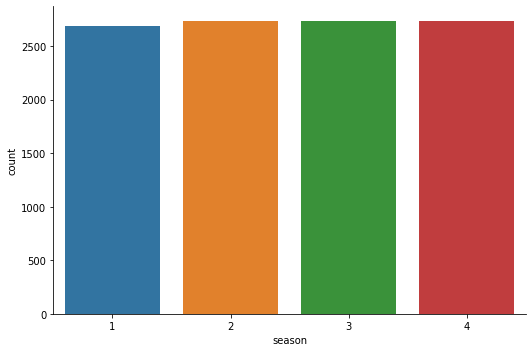

In [13]:
sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1.5)

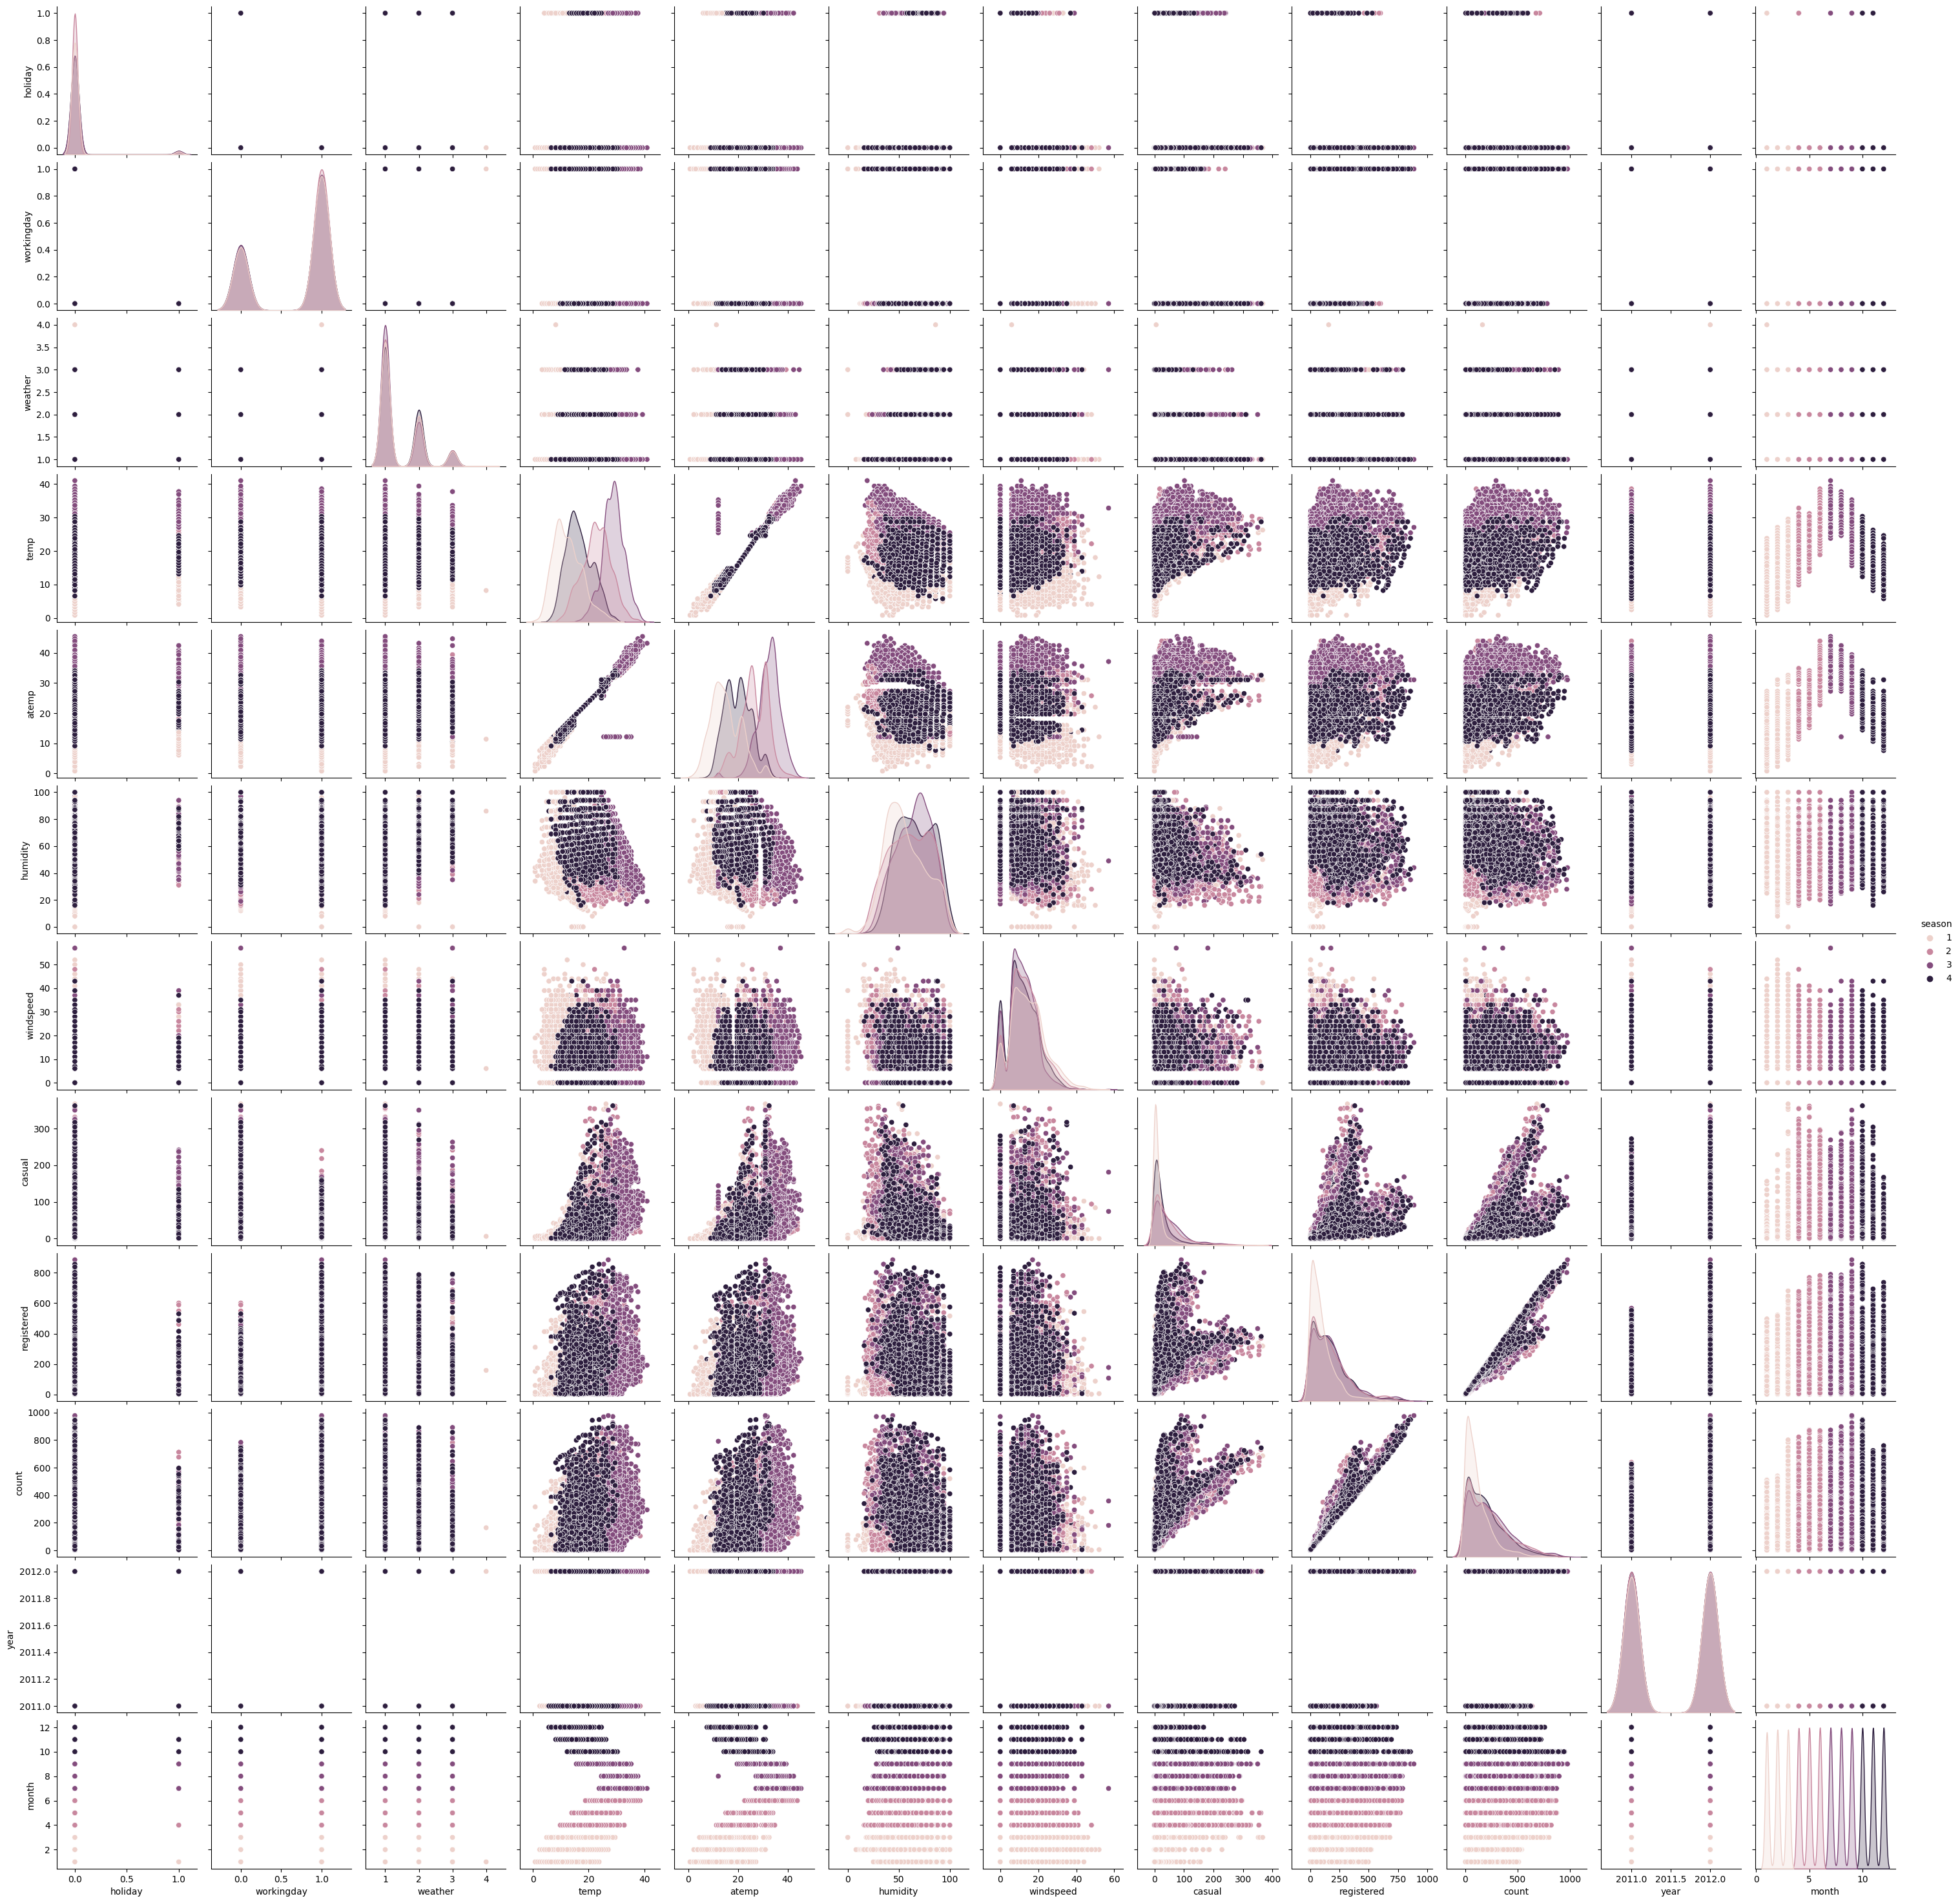

In [14]:
#visualizacao de graficos em matrizes com seaborn
sns.pairplot(dfc, hue="season")
plt.show()

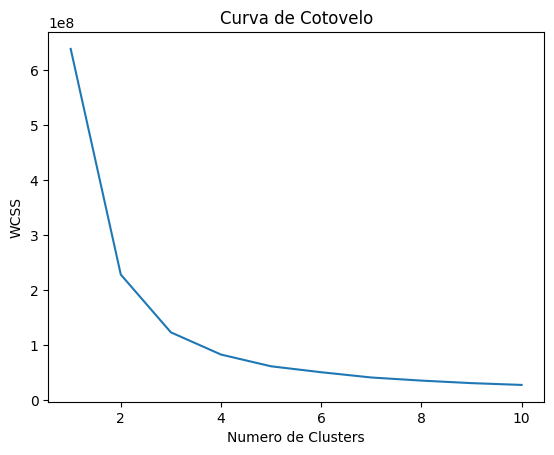

In [15]:
# Cria a Curva de Cotovelo para encontrar o Numero Ideal de Clusters
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dfc)
    wcss.append(kmeans.inertia_)
    
# Mostra o Gráfico
plt.plot(range(1, 11), wcss)
plt.title('Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [16]:
# Silhueta 
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(dfc)
    score = silhouette_score(dfc, preds)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

Silhueta para 2 clusters : 0.6024911342007668
Silhueta para 3 clusters : 0.5426345568127351
Silhueta para 4 clusters : 0.5102269753769617
Silhueta para 5 clusters : 0.4867874940967576
Silhueta para 6 clusters : 0.4522000612881441
Silhueta para 7 clusters : 0.45762552385290006
Silhueta para 8 clusters : 0.4379999896300538
Silhueta para 9 clusters : 0.43044761173944923
Silhueta para 10 clusters : 0.39800497427388354


In [17]:
from sklearn.cluster import KMeans

# Se não colocarmos o número de clusters, o valor default de número de clusters é de 8 clusters. Utilizei 2, pela curva de cotovelo
modelokm = KMeans(n_clusters=4)

# Cria o modelo de clusterização para agrupar os dados
modelokm = modelokm.fit(dfc)

# Mostra quais são as coordenadas de cada centroid para cada dimensão.
modelokm.cluster_centers_

array([[2.78899573e+00, 3.89957265e-02, 5.88141026e-01, 1.31570513e+00,
        2.44247863e+01, 2.81727698e+01, 5.41623932e+01, 1.36294822e+01,
        9.07922009e+01, 3.07308761e+02, 3.98100962e+02, 2.01164370e+03,
        7.39316239e+00],
       [2.28380874e+00, 3.09870716e-02, 6.49907654e-01, 1.50523292e+00,
        1.69903058e+01, 2.01473682e+01, 6.85661810e+01, 1.18097200e+01,
        6.64046788e+00, 3.76987482e+01, 4.43392161e+01, 2.01140509e+03,
        5.81715576e+00],
       [2.77604977e+00, 1.08864697e-02, 8.66251944e-01, 1.25972006e+00,
        2.50488958e+01, 2.87832271e+01, 5.30528771e+01, 1.42350617e+01,
        8.77542768e+01, 5.67325039e+02, 6.55079316e+02, 2.01184759e+03,
        7.39191291e+00],
       [2.61635220e+00, 2.28702115e-02, 7.39565466e-01, 1.38164666e+00,
        2.16151344e+01, 2.51812693e+01, 5.83384791e+01, 1.34699593e+01,
        3.81323613e+01, 1.62825329e+02, 2.00957690e+02, 2.01149743e+03,
        6.87621498e+00]])

In [18]:
# Mostra a quantidade de clusters
modelokm.n_clusters

4

In [19]:
# Mostra as labels
labels = modelokm.labels_
labels 

array([1, 1, 1, ..., 3, 3, 1], dtype=int32)

In [20]:
# Faz a clusterização dos dados usando o modelo criado
grupos = modelokm.predict(dfc)

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(dfc)


In [22]:
#Contagem
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 4876, 0: 3495, 3: 1872, 2: 643})

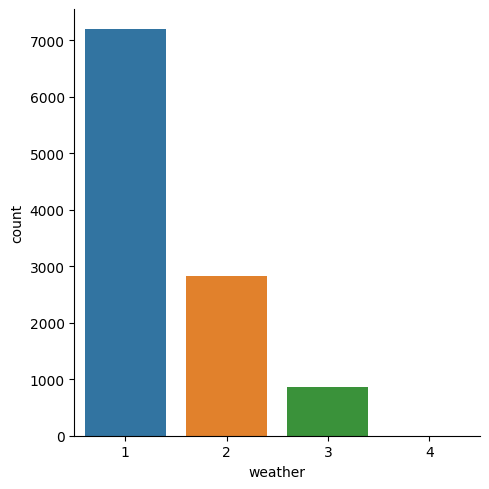

In [23]:
#impressao de contagem de coluna weather - em 1, contagem maior
sns.factorplot(x='weather',data=dfc,kind='count',size=5,aspect=1) 

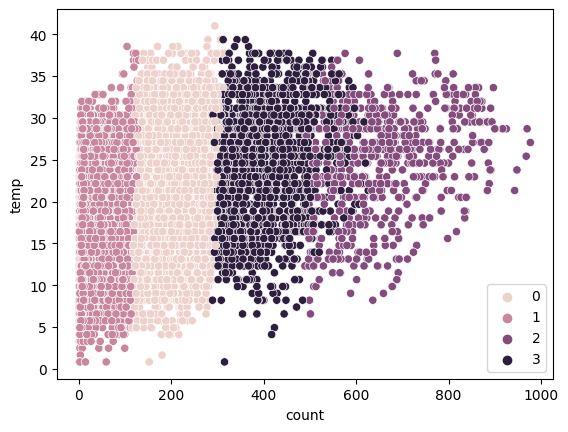

In [24]:
#Scatterplot de count e temp --- em 2 ---> maiores valores, em 1 ---> menores valores
sns.scatterplot(data=dfc, x="count", y="temp", hue=kmeans.labels_)
plt.show()

In [25]:
# Cross-tabulation

dfc = pd.DataFrame({'count':labels,"season":dfc['season']})
ct1 = pd.crosstab(dfc['count'],dfc['season'])
ct1

season     1     2    3     4
count                        
0        177   556  624   515
1       1748  1091  934  1098
2         52   203  225   163
3        709   883  950   958

<AxesSubplot:title={'center':'KMeans'}, xlabel='season', ylabel='count'>

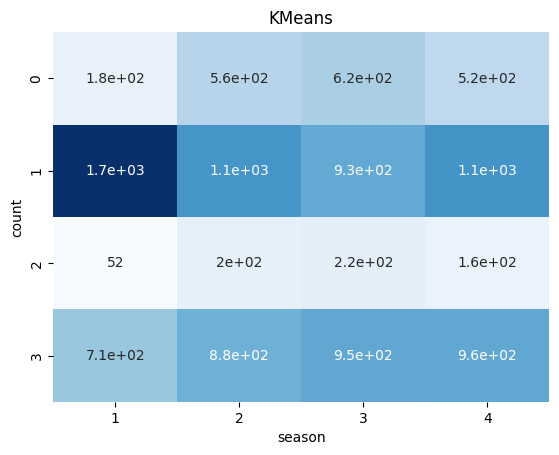

In [26]:
#mapa de calor de contagem e weather
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")

In [27]:
print(modelokm.inertia_)

82847897.7477666


In [28]:
modelorm = KMeans(n_init=10)

<AxesSubplot:>

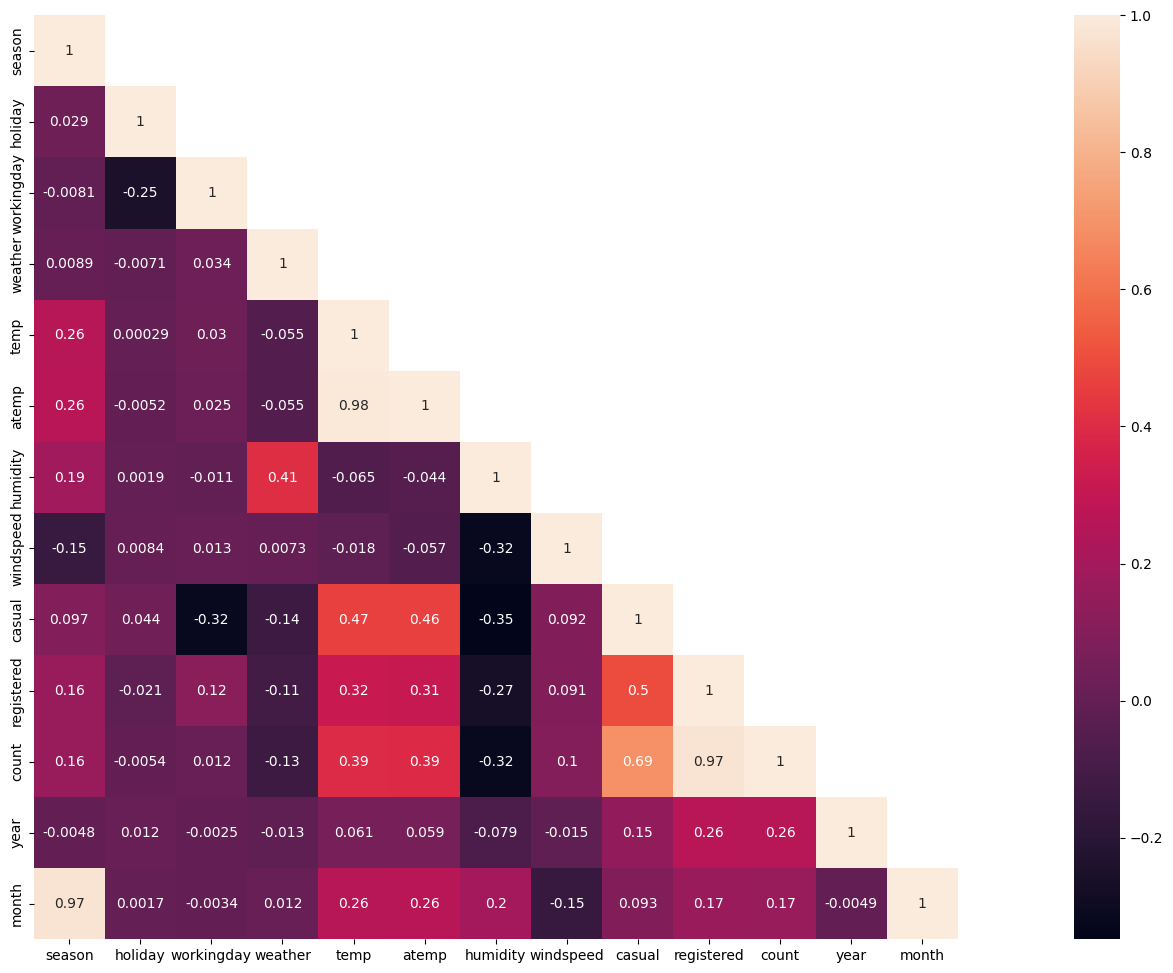

In [29]:
#matriz de correlacao do dataframe original
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)